In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE




In [2]:
def load_data():
    """Load data from a CSV file."""
    return pd.read_csv("file/HR_comma_sep.csv")


In [3]:
df= load_data()

In [4]:
df.shape

(14999, 10)

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df["salary"].unique()


array(['low', 'medium', 'high'], dtype=object)

In [9]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [10]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [11]:
numeric_columns=df.select_dtypes(include=['number']).columns
numeric_columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [12]:
numeric_df=df.select_dtypes(include=['number'])

In [13]:
correl_matrix = numeric_df.corr()


In [14]:
correl_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


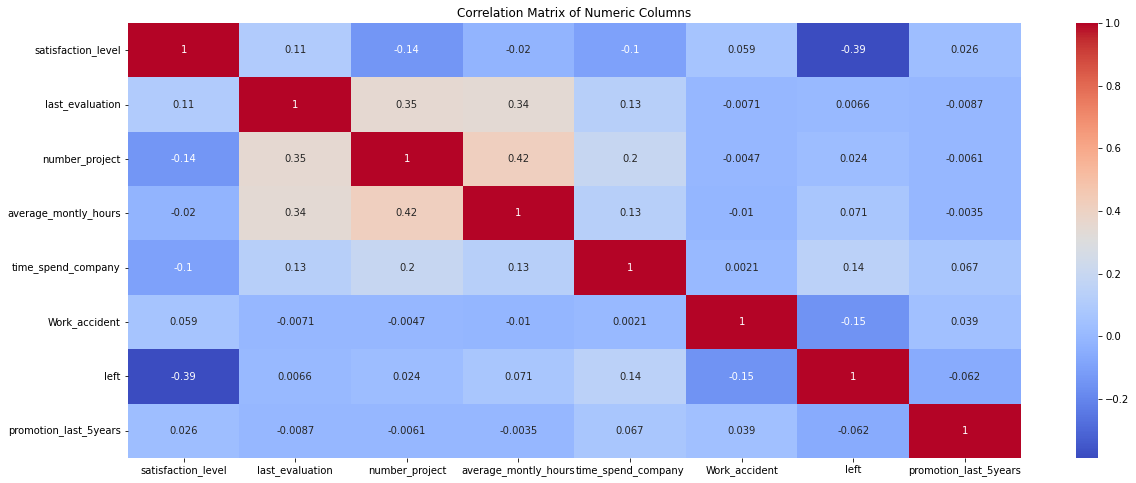

In [15]:
plt.figure(figsize=(20, 8))
sns.heatmap(correl_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Columns")
plt.show()


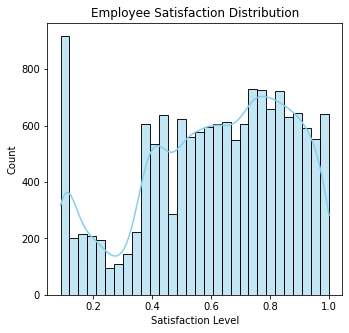

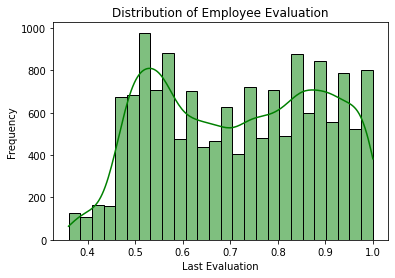

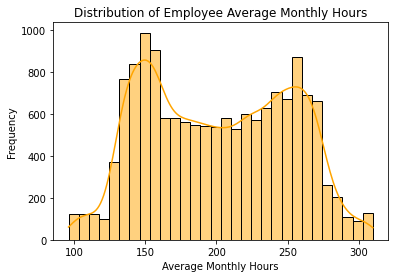

In [16]:
plt.figure(figsize=(18, 5))

# Plot 1: Employee Satisfaction
plt.subplot(1, 3, 1)
sns.histplot(df['satisfaction_level'], kde=True, color='skyblue')
plt.title('Employee Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.subplot(1,3,1)
plt.figure(figsize=(6,4))
sns.histplot(df['last_evaluation'], kde=True, color='green')
plt.title('Distribution of Employee Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(6,4))
sns.histplot(df['average_montly_hours'], kde=True, color='orange')
plt.title('Distribution of Employee Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()




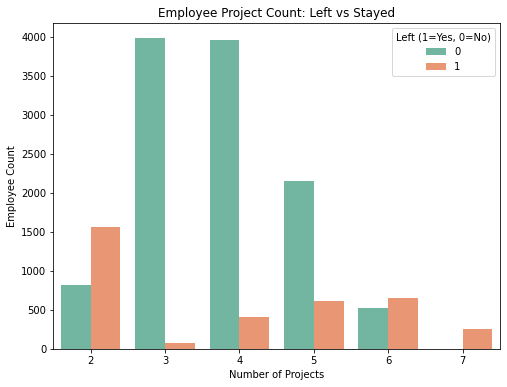

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='number_project', hue='left', data=df, palette='Set2')

plt.title('Employee Project Count: Left vs Stayed')
plt.xlabel('Number of Projects')
plt.ylabel('Employee Count')
plt.legend(title='Left (1=Yes, 0=No)')
plt.show()


In [18]:
df_left = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]


In [19]:
df_left

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [20]:
#  Apply K-means clustering (3 clusters)


In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_left['cluster'] = kmeans.fit_predict(df_left)


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


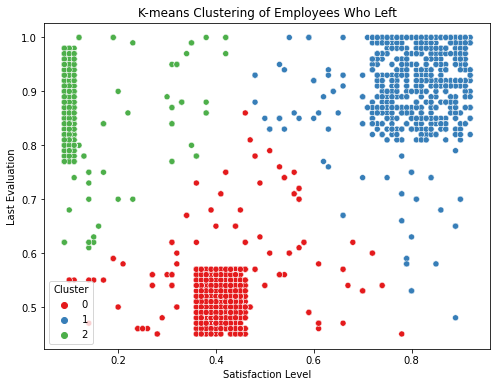

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='satisfaction_level',
    y='last_evaluation',
    hue='cluster',
    palette='Set1',
    data=df_left
)
plt.title('K-means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()


In [23]:
# Cluster 0: Low Satisfaction, Low Evaluation
# Cluster 1: Low Satisfaction, High Evaluation
# Cluster 3: High Satisfaction, High Evaluation



In [24]:
# 4.1. Pre-process categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(exclude=['object']).columns


In [25]:
# string (text column)
categorical_cols.shape


(2,)

In [26]:
# numeric column
numeric_cols.shape

(8,)

In [27]:
# Convert categorical variables to dummy/indicator variables
df_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)
df_numeric = df[numeric_cols]


In [28]:
df_categorical

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0,1,0
14995,0,0,0,0,0,0,0,1,0,1,0
14996,0,0,0,0,0,0,0,1,0,1,0
14997,0,0,0,0,0,0,0,1,0,1,0


In [29]:
# Combine categorical and numeric variables
df_processed = pd.concat([df_numeric, df_categorical], axis=1)
df_processed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [30]:
# Separate features and target
X = df_processed.drop('left', axis=1)
y = df_processed['left']




In [31]:
#Stratified train-test split (80:20)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=123
)


In [33]:
print("Before SMOTE:")
print(y_train.value_counts())


Before SMOTE:
0    9142
1    2857
Name: left, dtype: int64


In [34]:
#Apply SMOTE to upsample minority class



In [35]:
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(y_train_resampled.value_counts())

After SMOTE:
0    9142
1    9142
Name: left, dtype: int64


In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc



In [37]:
# Define 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)


In [38]:
# 5.1 Logistic Regression



In [39]:
log_reg = LogisticRegression(max_iter=1000, random_state=123)
y_pred_log = cross_val_predict(log_reg, X_train_resampled, y_train_resampled, cv=cv)
print("Logistic Regression Classification Report:")
print(classification_report(y_train_resampled, y_pred_log))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      9142
           1       0.77      0.82      0.80      9142

    accuracy                           0.79     18284
   macro avg       0.79      0.79      0.79     18284
weighted avg       0.79      0.79      0.79     18284



In [40]:
# 5.2 Random Forest

In [41]:
rf = RandomForestClassifier(n_estimators=100, random_state=123)
y_pred_rf = cross_val_predict(rf, X_train_resampled, y_train_resampled, cv=cv)
print("Random Forest Classification Report:")
print(classification_report(y_train_resampled, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9142
           1       0.99      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.98      0.98      0.98     18284
weighted avg       0.98      0.98      0.98     18284



In [42]:
# 5.3 Gradient Boosting

In [43]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=123)
y_pred_gb = cross_val_predict(gb, X_train_resampled, y_train_resampled, cv=cv)
print("Gradient Boosting Classification Report:")
print(classification_report(y_train_resampled, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9142
           1       0.98      0.94      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



In [44]:
log_reg_r = LogisticRegression().fit(X_train_resampled, y_train_resampled)
rf_r = RandomForestClassifier(n_estimators=100, random_state=123).fit(X_train_resampled, y_train_resampled)
gb_c = GradientBoostingClassifier(n_estimators=100, random_state=123).fit(X_train_resampled, y_train_resampled)



/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# Predict probabilities
log_reg_probs = log_reg_r.predict_proba(X_test)[:, 1]
rf_probs = rf_r.predict_proba(X_test)[:, 1]
gb_probs = gb_c.predict_proba(X_test)[:, 1]


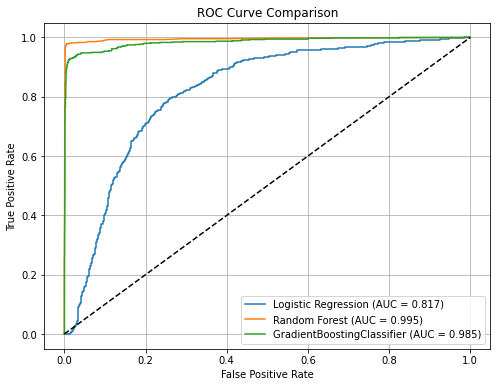

In [46]:
# Compute ROC curve and AUC
models = {
    "Logistic Regression": log_reg_probs,
    "Random Forest": rf_probs,
    "GradientBoostingClassifier": gb_probs
}

plt.figure(figsize=(8, 6))

for name, probs in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
    
    

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [51]:
#7.1.	Using the best model, predict the probability of employee turnover in the test data.
 # Random Forest is best model
y_prob = rf_r.predict_proba(X_test)[:, 1]
# Add probabilities to your test dataframe
test_ser=pd.Series(y_prob,name="turnover_probability")
df_test = test_ser.to_frame()
df_test






,turnover_probability
0,0.00
1,0.56
2,0.09
3,0.00
4,0.01
...,...
2995,0.00
2996,0.01
2997,0.04
2998,0.02


In [ ]:
#	Based on the probability score range below, categorize the employee

In [56]:
def categorize_zone(score):
    if score < 0.20:
        return "Safe Zone (Green)"
    elif score < 0.60:
        return "Low-Risk Zone (Yellow)"
    elif score < 0.90:
        return "Medium-Risk Zone (Orange)"
    else:
        return "High-Risk Zone (Red)"


In [57]:

df_test['Zone']= df_test['turnover_probability'].apply(categorize_zone)

In [58]:
df_test

,turnover_probability,Zone
0,0.00,Safe Zone (Green)
1,0.56,Low-Risk Zone (Yellow)
2,0.09,Safe Zone (Green)
3,0.00,Safe Zone (Green)
4,0.01,Safe Zone (Green)
...,...,...
2995,0.00,Safe Zone (Green)
2996,0.01,Safe Zone (Green)
2997,0.04,Safe Zone (Green)
2998,0.02,Safe Zone (Green)
